In [1]:
import os
import yaml
import pandas as pd
import numpy as np
import scipy.io
import scanpy as sc
import humanfriendly

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

## Parameters

In [3]:
# this cell is tagged `parameters` and will be overridden by papermill
sample_name = "2090_CS1429a_T_1_CD45pos_citeseq_1_CITE"
workflow_id = "bb49f3ef-64cf-434c-89d9-eaf202c46a76"
path_data = os.path.join("./citeseq/", sample_name, workflow_id)

## Run Report

In [4]:
!cat $path_data/report/run_report.yaml

Date: 2021-07-26
Running time: 17.0 minutes, 3.313 seconds
CITE-seq-Count Version: 1.4.3
Reads processed: 42687903
Percentage mapped: 96
Percentage unmapped: 4
Uncorrected cells: 0
Correction:
	Cell barcodes collapsing threshold: 1
	Cell barcodes corrected: 37951
	UMI collapsing threshold: 1
	UMIs corrected: 40927
Run parameters:
	Read1_filename: /tmp/scratch/dp-lab-gwf-core/cromwell-execution/CiteSeq/bb49f3ef-64cf-434c-89d9-eaf202c46a76/call-Preprocess/Preprocess/09c7a69b-5bf3-48a4-90a9-0c84d254102d/call-TrimR1/R1.fastq.gz
	Read2_filename: /tmp/scratch/dp-lab-gwf-core/cromwell-execution/CiteSeq/bb49f3ef-64cf-434c-89d9-eaf202c46a76/call-Preprocess/Preprocess/09c7a69b-5bf3-48a4-90a9-0c84d254102d/call-TrimR2/R2.fastq.gz
	Cell barcode:
		First position: 1
		Last position: 16
	UMI barcode:
		First position: 17
		Last position: 28
	Expected cells: 0
	Tags max errors: 2
	Start trim: 0


In [5]:
with open(os.path.join(path_data, "report/run_report.yaml"), "rt") as fin:
    # report file contains tabs
    # run_report = yaml.load(fin, Loader=yaml.FullLoader)        
    run_report = fin.read().replace("\t", "  ")
    run_report = yaml.load(run_report, Loader=yaml.FullLoader)

In [6]:
# num of reads processed
humanfriendly.format_number(run_report["Reads processed"])

'42,687,903'

In [7]:
# percentage mapped
run_report["Percentage mapped"]

96

## Load AnnData

In [8]:
adata = sc.read_h5ad(os.path.join(path_data, f"{sample_name}.h5ad"))

In [9]:
adata.obs

,unmapped,barcode_sequence
cell_barcodes,,
192189933402926,1,GTGAGCCAGGTTGAGC
161409812875190,9,AAGACAACATCATCCC
199874688793307,4,GGTAATCTCACTGTTT
236176872230179,6,CGGACACCAAGACAAT
134946219313900,3,TCGTGCTGTGCAGTGA
...,...,...
162096976156899,4,AACCCAAAGTGGATAT
135501316017525,2,TCCTCTTTCTGACGCG
134385041884982,8,TCATATCAGTCATACC


In [10]:
adata.var

,feature_name
A0005-ACGAATCAATCTGTG,2D10
A0006-GTCTTTGTCAGTGCA,IT2.2
A0007-GTTGTCCGACAATAC,29E.2A3
A0008-TCAACGCTTGGCTAG,24F.10C12
A0010-GACTGGGAGGGTATT,DCN.70
...,...
A0167-ACTTCCGTCGATCTT,E11
A0214-TCCTTGGATGTACCG,FIB504
A0865-TGATCCGAAGTCGTG,9D9F9
A0072-TGTTCCCGCTCAACT,RPA-T4


## Load Read Counts

In [11]:
mtx = scipy.io.mmread(
    os.path.join(path_data, "reads/matrix.mtx.gz")
)

In [12]:
adata.layers["reads"] = mtx.T.tocsr()[:, :-1]

In [13]:
adata.obs["unmapped_reads"] = mtx.T.toarray()[:, -1]

In [14]:
adata.obs

,unmapped,barcode_sequence,unmapped_reads
cell_barcodes,,,
192189933402926,1,GTGAGCCAGGTTGAGC,20
161409812875190,9,AAGACAACATCATCCC,31
199874688793307,4,GGTAATCTCACTGTTT,50
236176872230179,6,CGGACACCAAGACAAT,6
134946219313900,3,TCGTGCTGTGCAGTGA,4
...,...,...,...
162096976156899,4,AACCCAAAGTGGATAT,30
135501316017525,2,TCCTCTTTCTGACGCG,3
134385041884982,8,TCATATCAGTCATACC,130


## Read Counts

In [15]:
adata.to_df(layer="reads")

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0390-GTGTGTTGTCCTATG,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT
cell_barcodes,,,,,,,,,,,,,,,,,,,,,
192189933402926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
161409812875190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,0,0,0,2,32
199874688793307,0,0,0,0,0,0,0,0,0,0,...,46,0,0,0,0,0,0,0,45,0
236176872230179,0,0,0,0,0,0,0,0,0,0,...,68,0,0,0,1,0,0,0,2,108
134946219313900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162096976156899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
135501316017525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
134385041884982,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,4,0,0,12


### Matrix vs. Run Report

Note that unmapped reads are excluded.

In [16]:
adata.layers["reads"].sum()

4800722

In [17]:
adata.layers["reads"].sum(), run_report["Reads processed"]

(4800722, 42687903)

In [18]:
adata.layers["reads"].sum() / run_report["Reads processed"] * 100

11.246094707439717

### Total Reads per ADT

In [19]:
adata.var["total_reads"] = adata.layers["reads"].sum(axis=0).A1

In [20]:
adata.var["total_reads"]

A0005-ACGAATCAATCTGTG      3057
A0006-GTCTTTGTCAGTGCA      1506
A0007-GTTGTCCGACAATAC      8611
A0008-TCAACGCTTGGCTAG      7238
A0010-GACTGGGAGGGTATT      8876
                          ...  
A0167-ACTTCCGTCGATCTT      7159
A0214-TCCTTGGATGTACCG     12526
A0865-TGATCCGAAGTCGTG     10743
A0072-TGTTCCCGCTCAACT     30580
A0133-CTGTAGCCGCCTATT    117184
Name: total_reads, Length: 277, dtype: int64

### Total Reads per Celluar Barcode

In [21]:
adata.obs["total_reads"] = adata.layers["reads"].sum(axis=1).A1

In [22]:
adata.obs["total_reads"]

cell_barcodes
192189933402926    1430
161409812875190    2203
199874688793307     829
236176872230179    1596
134946219313900      68
                   ... 
162096976156899    1364
135501316017525     968
134385041884982     927
192129432241886    2727
191164509538157     651
Name: total_reads, Length: 4163, dtype: int64

### Zero Rows

In [23]:
np.count_nonzero(adata.obs["total_reads"] == 0)

1

In [24]:
np.count_nonzero(adata.obs["total_reads"] == 0) / adata.shape[0]

0.00024021138601969732

### Overall Stats

In [25]:
adata.to_df(layer="reads").sum(axis=1).describe()

count     4163.000000
mean      1153.188086
std        587.700132
min          0.000000
25%        788.000000
50%       1074.000000
75%       1411.000000
max      11142.000000
dtype: float64

### 95 Percentile

In [26]:
percentile_95 = adata.obs["total_reads"].describe(percentiles=[0.95])["95%"]
percentile_95

2174.5999999999985

In [27]:
adata.to_df(layer="reads")[ adata.obs["total_reads"] > percentile_95 ]

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0390-GTGTGTTGTCCTATG,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT
cell_barcodes,,,,,,,,,,,,,,,,,,,,,
161409812875190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,0,0,0,2,32
204911389358835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,267,0,0,0,0,1
169039925239206,0,0,0,0,5,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,94
161959837591973,0,0,1,0,57,0,0,0,0,0,...,3,0,0,0,0,0,0,0,3,27
230600496822133,0,30,0,0,0,0,0,1,0,79,...,0,0,0,0,0,0,1,0,2,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228067686399275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,31,0,1,0,1,54
157684178729253,0,0,47,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,44
235619300267756,0,0,0,238,0,0,0,0,0,0,...,0,0,0,0,50,0,0,0,1,0


In [28]:
adata.to_df(layer="reads")[ adata.obs["total_reads"] > percentile_95 ].sample(5, random_state=0)

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0390-GTGTGTTGTCCTATG,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT
cell_barcodes,,,,,,,,,,,,,,,,,,,,,
129574530148661,0,0,0,2,0,0,0,1,0,0,...,29,0,0,0,0,0,2,0,1,0
195976649927086,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
227911878495539,0,0,62,0,48,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,3
204882352498997,0,0,0,0,0,0,0,0,0,0,...,21,0,0,0,44,0,0,1,0,226
200418700413165,0,0,0,0,0,0,1,0,0,0,...,0,0,90,0,0,145,0,1,0,2


In [29]:
adata.to_df(layer="reads")[ adata.obs["total_reads"] > percentile_95 ].sample(5, random_state=0).sum(axis=1)

cell_barcodes
129574530148661    2483
195976649927086    5275
227911878495539    2196
204882352498997    2456
200418700413165    2339
dtype: int64

### Histogram (sum of reads across ADTs)

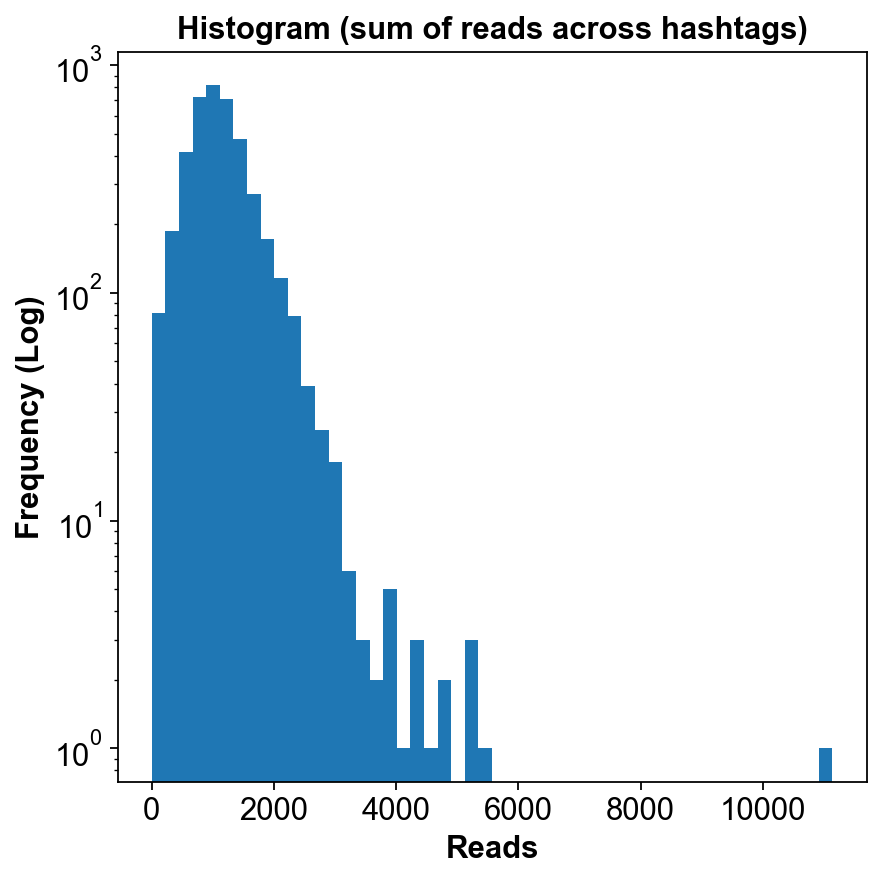

In [30]:
fig, ax = plt.subplots(figsize=(6,6), facecolor="white")

ax.hist(adata.obs["total_reads"].sort_values(ascending=False), bins=50)

ax.set_xlabel("Reads", fontweight="bold")
ax.set_ylabel("Frequency (Log)", fontweight="bold")
ax.set_title("Histogram (sum of reads across hashtags)", fontweight="bold")
ax.grid(b=False)

plt.yscale("log")
plt.show()

### Histogram (sum of reads per ADTs)

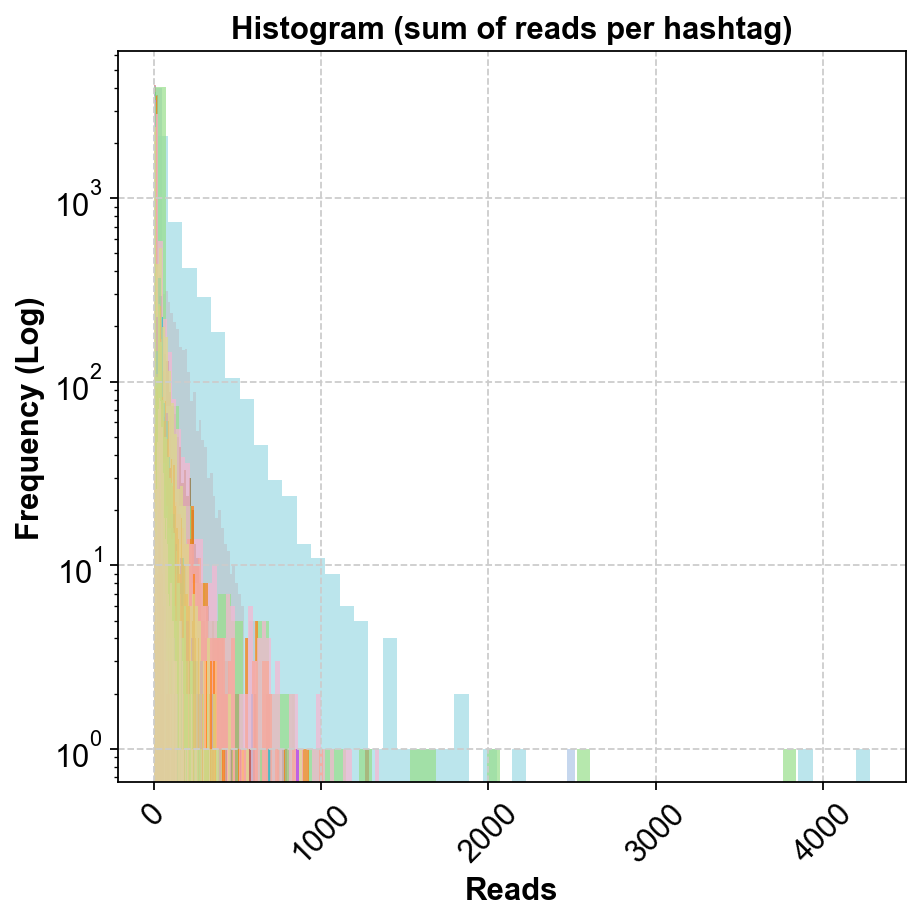

In [31]:
fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")
    
for idx, col in enumerate(adata.var_names):
    
    df_tmp = np.sort(adata.layers["reads"][:, idx].A.ravel())[::-1]

    ax.hist(df_tmp, bins=50, alpha=0.7, label=col)

ax.set_xlabel("Reads", fontweight="bold")
ax.set_ylabel("Frequency (Log)", fontweight="bold")
ax.tick_params(axis="x", rotation=45)
ax.set_title("Histogram (sum of reads per hashtag)", fontweight="bold")
ax.grid(b=True, linestyle="--")

plt.yscale("log")
plt.tight_layout()
plt.show()

### Unmapped

In [32]:
adata.obs["unmapped_reads"].sort_values(ascending=False)

cell_barcodes
232250180061485    565
165310986042222    520
135693696874285    500
231358992374700    458
157534901192942    454
                  ... 
166402815899372      0
231349297572571      0
135022742231333      0
134945413983476      0
126760267435253      0
Name: unmapped_reads, Length: 4163, dtype: int64

In [33]:
adata.obs["unmapped_reads"].sum()

188703

## UMI Counts

In [34]:
adata.to_df()

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0390-GTGTGTTGTCCTATG,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT
cell_barcodes,,,,,,,,,,,,,,,,,,,,,
192189933402926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
161409812875190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,1,1
199874688793307,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,1,0
236176872230179,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,0,0,0,2,2
134946219313900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162096976156899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
135501316017525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
134385041884982,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2,0,0,1


In [35]:
# total UMIs per cell barcode
adata.obs["total_umis"] = adata.X.sum(axis=1).A1

### Histogram (sum of UMIs across ADTs)

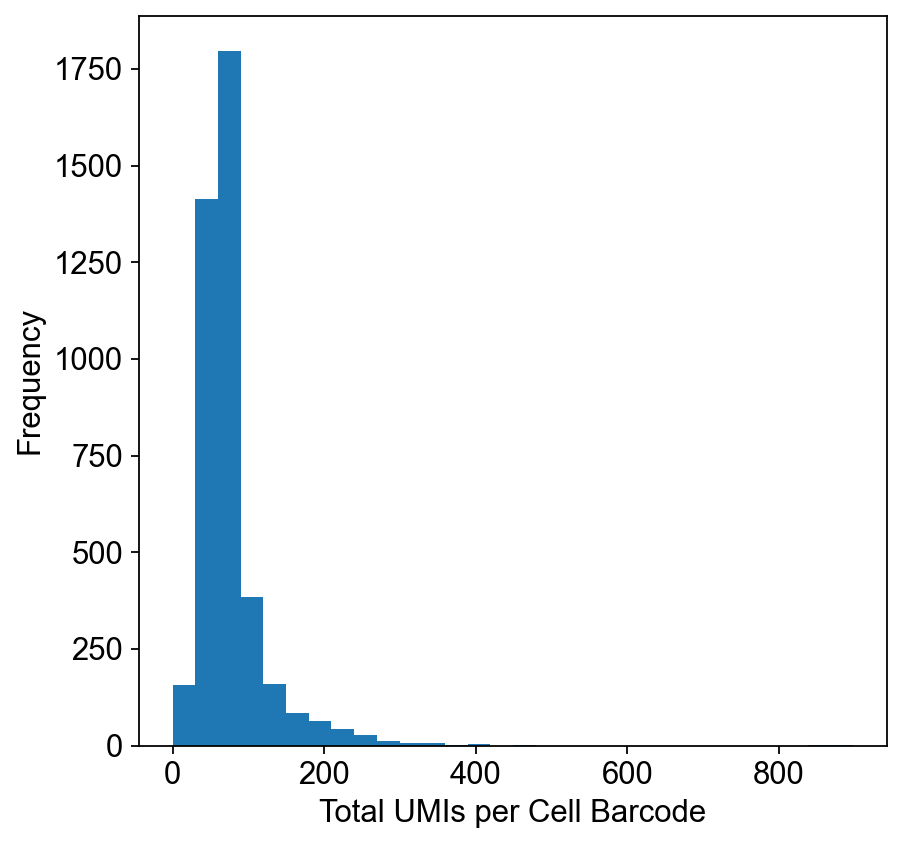

In [36]:
fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")

ax.hist(adata.obs["total_umis"], bins=30)
ax.set_xlabel("Total UMIs per Cell Barcode")
ax.set_ylabel("Frequency")
ax.grid(b=False)

plt.tight_layout
plt.show()

In [37]:
adata.to_df().describe()

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0390-GTGTGTTGTCCTATG,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT
count,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,...,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000
mean,0.060533,0.017535,0.123228,0.081432,0.153015,0.071343,0.123469,0.025222,0.101369,0.073264,...,0.465289,0.025462,0.107134,0.031948,0.917127,0.168388,0.266154,0.213788,0.714148,0.889503
std,0.253161,0.148450,0.378984,0.310552,0.450727,0.281502,0.383632,0.165756,0.351841,0.297618,...,0.855731,0.159062,0.508982,0.185199,1.412548,0.801992,0.667625,0.487156,1.049454,1.121539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,3.000000,4.000000,5.000000,6.000000,5.000000,4.000000,3.000000,6.000000,4.000000,...,8.000000,2.000000,8.000000,2.000000,15.000000,11.000000,6.000000,4.000000,9.000000,23.000000


## Reads per UMI

### Calculate

In [38]:
# reads divided by UMI, replace NaN with zero
reads_per_umi = np.nan_to_num(adata.layers["reads"] / adata.X)

In [39]:
pd.DataFrame(reads_per_umi)

,0,1,2,3,4,5,6,7,8,9,...,267,268,269,270,271,272,273,274,275,276
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,5.5,0.0,0.0,0.0,2.000000,32.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,54.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,11.0
4159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500000,1.0
4160,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.000000,12.0
4161,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [40]:
adata.obs["total_umis"].sum()

315694

In [41]:
adata.obs["total_reads"].sum()

4800722

In [42]:
avg_reads_per_umi= adata.obs["total_reads"].sum() / adata.obs["total_umis"].sum()
avg_reads_per_umi

15.206883881226757

### Histogram

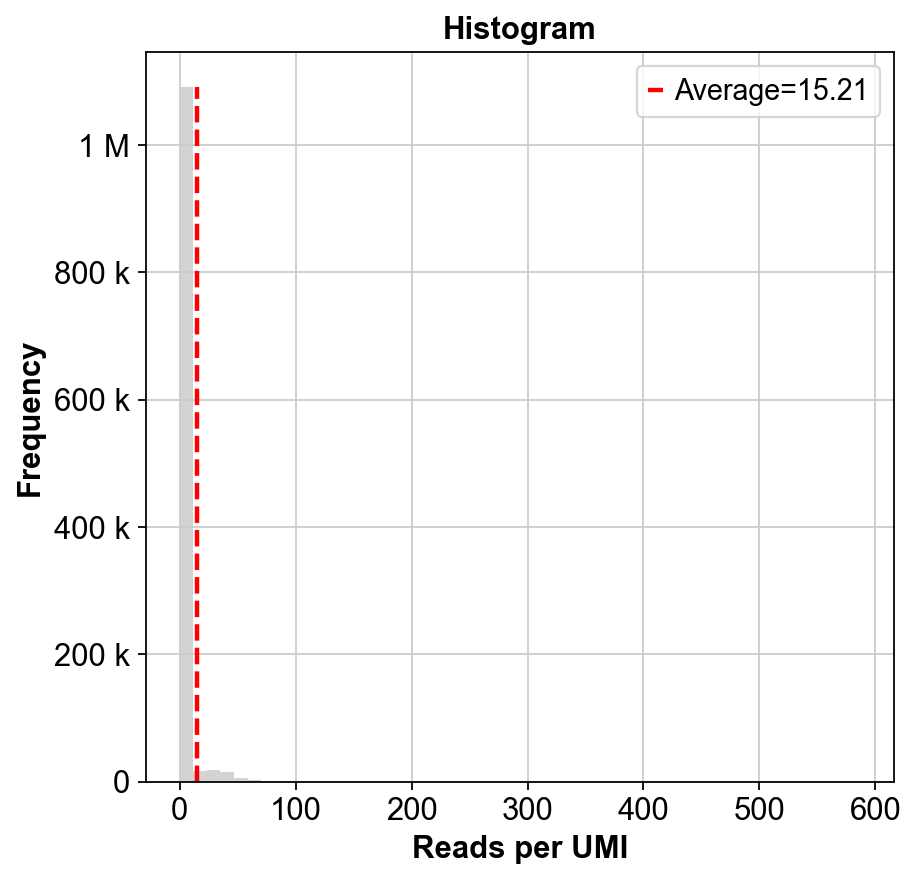

In [43]:
fig, ax = plt.subplots(figsize=(6,6), facecolor="white")

n, bins, _ = ax.hist(reads_per_umi.A1, bins=50, color="lightgray")
ax.vlines(
    x=avg_reads_per_umi,
    ymin=0, ymax=np.max(n),
    color="red", linestyle="--", lw=2,
    label=f"Average={avg_reads_per_umi:.2f}"
)

ax.set_xlabel("Reads per UMI", fontweight="bold")
ax.set_ylabel("Frequency", fontweight="bold")
ax.yaxis.set_major_formatter(matplotlib.ticker.EngFormatter())
ax.set_title("Histogram", fontweight="bold")
ax.legend()

plt.show()

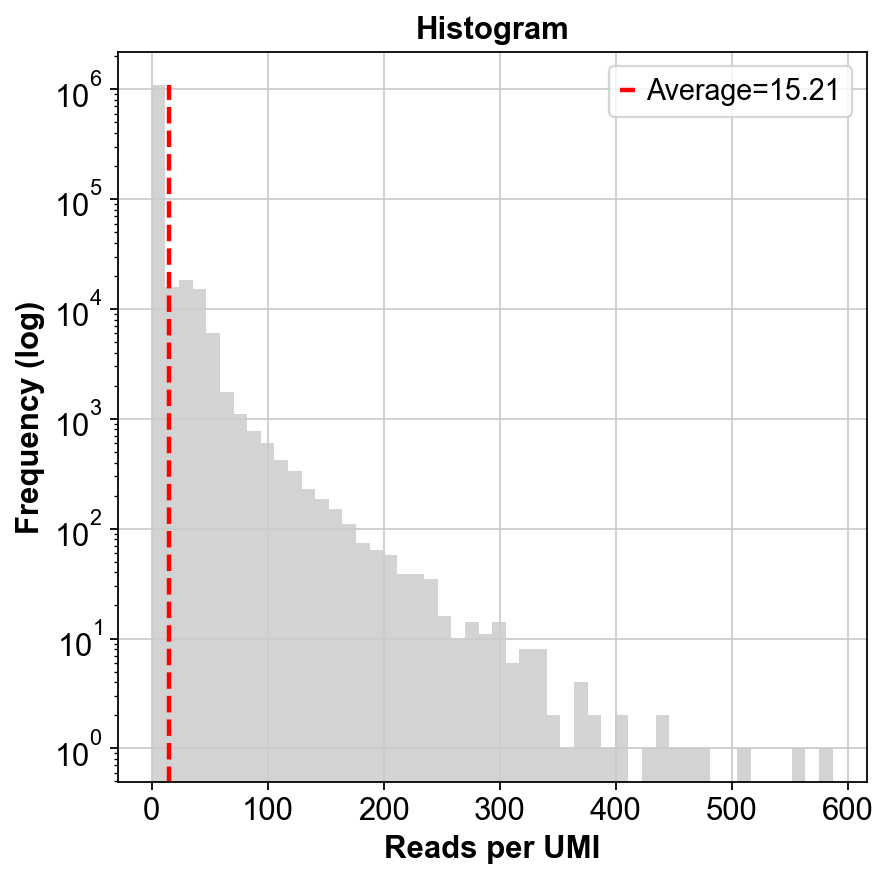

In [44]:
fig, ax = plt.subplots(figsize=(6,6), facecolor="white")

n, bins, _ = ax.hist(reads_per_umi.A1, bins=50, color="lightgray")
ax.vlines(
    x=avg_reads_per_umi,
    ymin=0, ymax=np.max(n),
    color="red", linestyle="--", lw=2,
    label=f"Average={avg_reads_per_umi:.2f}"
)

ax.set_xlabel("Reads per UMI", fontweight="bold")
ax.set_ylabel("Frequency (log)", fontweight="bold")
ax.set_title("Histogram", fontweight="bold")
ax.legend()

plt.yscale("log")
plt.show()

## Write adata to Disk

In [45]:
adata

AnnData object with n_obs × n_vars = 4163 × 277
    obs: 'unmapped', 'barcode_sequence', 'unmapped_reads', 'total_reads', 'total_umis'
    var: 'feature_name', 'total_reads'
    layers: 'reads'

In [46]:
adata.write(os.path.join(path_data, f"{sample_name}.QC.h5ad"))